In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
#import tick customization tools
import matplotlib.ticker as mticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


import matplotlib.dates as mdates
import seaborn as sns


In [2]:
df = pd.read_excel("Data/london_weather_MODIFIED.xlsx")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df['datetime'] = df['date'].copy()

In [5]:
## displaying format
df['datetime'].sample(n=10).sort_index()

3058     19870517
5721     19940831
6499     19961017
7146     19980726
8196     20010610
11772    20110326
11956    20110926
12879    20140406
13684    20160619
14552    20181104
Name: datetime, dtype: int64

In [6]:
df["date"] = pd.to_datetime(df['date'], format='%Y%m%d')
df["datetime"] = pd.to_datetime(df['datetime'], format='%Y%m%d')

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(9)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [8]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
date,,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020-12-27
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020-12-28
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020-12-29


In [9]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [10]:
#feature engineering for dates
#df['year'] = df['datetime'].dt.year
#df['month'] = df['datetime'].dt.month_name()
#df['day of month'] = df['datetime'].dt.day
#df['day of week'] = df['datetime'].dt.day_name()
#df

In [11]:
df = df.drop(columns= ["cloud_cover", "sunshine", "global_radiation", "pressure", "datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       14951 non-null  float64
 1   mean_temp      14922 non-null  float64
 2   min_temp       14955 non-null  float64
 3   precipitation  14951 non-null  float64
 4   snow_depth     13589 non-null  float64
dtypes: float64(5)
memory usage: 719.1 KB


In [12]:
df_2000 = df.loc['2000':]
df_2000

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


# Imputing

In [13]:
df_2000.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [14]:
df_2000 = df_2000.interpolate()
df_2000

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [15]:
df_2000.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# Q1: What month had the most precipitation between 2000 through 2010?

In [16]:
df_q1 = df_2000.loc["2000":"2010"]
df_q1.info()
df_q1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       4018 non-null   float64
 1   mean_temp      4018 non-null   float64
 2   min_temp       4018 non-null   float64
 3   precipitation  4018 non-null   float64
 4   snow_depth     4018 non-null   float64
dtypes: float64(5)
memory usage: 188.3 KB


,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.0
2010-12-28,9.5,5.3,2.5,0.4,0.0
2010-12-29,7.7,6.8,4.1,1.4,0.0


In [17]:
ts = df_q1["precipitation"].copy()

In [18]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax;



In [19]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [20]:
ts_MS = ts.asfreq("MS")
ts_MS

date
2000-01-01     0.000000
2000-02-01     9.800000
2000-03-01     0.200000
2000-04-01     0.600000
2000-05-01     0.000000
                ...    
2010-08-01     0.000000
2010-09-01     0.000000
2010-10-01    10.400000
2010-11-01     2.266667
2010-12-01     2.200000
Freq: MS, Name: precipitation, Length: 132, dtype: float64

In [21]:
#Checking date of most precipitation
date_most_prec = ts_MS.idxmax()
date_most_prec

Timestamp('2003-01-01 00:00:00', freq='MS')

In [22]:
#Value of precipitation on said day
ts_MS.loc[date_most_prec]

16.0

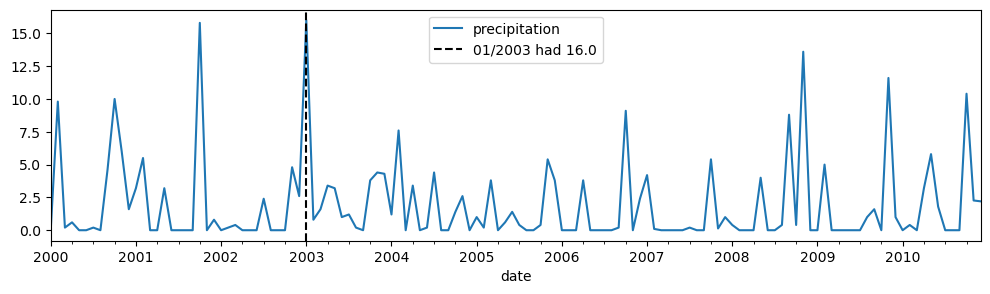

In [23]:
ax = ts_MS.plot(figsize=(12,3));
fmt = "%m/%Y"
ax.axvline(date_most_prec, ls='--',color='k', 
           label=f"{date_most_prec.strftime(fmt)} had {ts_MS.loc[date_most_prec]}")
ax.legend()

# Q2 Which year between 2000-2020 had the coolest average temperature?

In [24]:
df_q2 =  df_2000.loc["2000":"2022"]
df_q2.info()
df_q2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [25]:
ts_Y = df_q2.asfreq("AS")
ts_Y

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.80,7.0,4.9,0.0,0.0
2001-01-01,10.80,5.3,-0.5,3.2,0.0
2002-01-01,4.20,-0.8,-5.3,0.0,0.0
2003-01-01,11.30,8.3,3.7,16.0,0.0
2004-01-01,4.70,4.3,0.6,1.2,0.0
2005-01-01,12.00,8.6,5.1,1.0,0.0
2006-01-01,8.30,6.1,3.9,0.0,0.0
2007-01-01,9.70,7.4,5.1,4.2,0.0
2008-01-01,9.10,7.8,6.6,0.4,0.0


In [26]:
## using min and slicing to find the index
min_date = ts_mean.idxmin()
min_date

NameError: name 'ts_mean' is not defined

In [ ]:
df_q2.loc[min_date]

In [ ]:
ts_mean = ts_Y['mean_temp'].copy()


In [ ]:
ax= ts_mean.plot(marker='.', lw=1, figsize=(12,3))

fmt = "%Y"
#loc_year5 = mdates.YearLocator(5)
#loc_month = mdates.MonthLocator(12)
#fmt_year = mdates.DateFormatter(fmt)

## Change the font of the major ticks to stand out
ax.xaxis.set_tick_params(labelsize="large", rotation=90, bottom=True)


## Customize major ticks
#ax.xaxis.set_major_locator(loc_year5)
#ax.xaxis.set_major_formatter(fmt_year)

## Customize minor ticks
#ax.xaxis.set_minor_locator(loc_month)
#ax.xaxis.set_minor_formatter(fmt_year)


## Making major/minor gridlines visually distinct
#ax.grid(which='major', axis='x', color='k')

ax.axvline(min_date, ls='--', color='k', label=f"{min_date.strftime(fmt)} had {ts_mean.loc[min_date]}")
ax.set_title("Average Temperature")
ax.set_ylabel("Degrees")
ax.set_xlabel("")
ax.legend()